In [1]:
import pandas as pd
import numpy as np
df_small = pd.read_csv("Data/small.csv")
df_small

,state,county,repub_percent_08,repub_percent_12
0,Texas,Red River,68.507522,69.944817
1,Texas,Walker,60.707197,64.971903
2,Kentucky,Powell,57.059533,61.727293
3,Texas,Schleicher,74.386503,77.384464
4,West Virginia,Morgan,60.857614,64.068711


In [5]:
df_small['diff'] = df_small['repub_percent_08'] - df_small['repub_percent_12']
df_small
#percent_08 den percent_12 yi çıkartıp yeni sütun ekleyip diff diye oraya yazmış

,state,county,repub_percent_08,repub_percent_12,diff
0,Texas,Red River,68.507522,69.944817,-1.437295
1,Texas,Walker,60.707197,64.971903,-4.264706
2,Kentucky,Powell,57.059533,61.727293,-4.667760
3,Texas,Schleicher,74.386503,77.384464,-2.997961
4,West Virginia,Morgan,60.857614,64.068711,-3.211097


In [7]:
df_small['abs_diff'] = df_small['diff'].abs()
df_small
#mutlak değerlerini aldık absdiff sütünuna yazdık

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
0,Texas,Red River,68.507522,69.944817,-1.437295,1.437295
1,Texas,Walker,60.707197,64.971903,-4.264706,4.264706
2,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760
3,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961
4,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097


In [9]:
from scipy.stats import rankdata

df_small['rank_abs_diff'] = rankdata(df_small['abs_diff'])
df_small
#küçükten büyüğe doğru rankdata ile sıralamasını yaptık

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
0,Texas,Red River,68.507522,69.944817,-1.437295,1.437295,1.0
1,Texas,Walker,60.707197,64.971903,-4.264706,4.264706,4.0
2,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760,5.0
3,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961,2.0
4,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097,3.0


In [11]:
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])
W

0

### Wilcoxon-Mann-Whitney Testi

Anlamlılık düzeyi 0.01 olarak belirlensin. `pingouin`'den **mwu** kullanarak bir Wilcoxon-Mann-Whitney testi çalıştırılabilir. Karşılaştırmak istenilen iki sayı sütununa karşılık gelen **x** ve **y** argümanlarını kabul eder, bu durumda **çocuk** ve **yetişkin**. 

`alternative`, alternatif hipotezin türünü belirler, bu durumda, önce **çocuk** olarak kodlayanların önce **yetişkin** olarak kodlayanlardan daha yüksek bir gelire sahip olduğu, ki bu sağ kuyruklu bir testtir. Burada, **p-değeri yaklaşık 10 üzeri negatif 19. kuvvet** olarak gösterilmektedir, bu da anlamlılık düzeyinden önemli ölçüde daha küçüktür.


In [14]:
import pingouin
alpha = 0.01
pingouin.wilcoxon(x=df_small['repub_percent_08'], 
                  y=df_small['repub_percent_12'], 
                  alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.72


In [16]:
import pandas as pd

df_stck= pd.read_feather("data/stack_overflow.feather")

In [20]:
age_vs_comp = df_stck[['converted_comp', 'age_first_code_cut']]
age_vs_comp #verdiğimiz iki sütunun ismini verdik ve o sütunlar döndü bize

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult
...,...,...
2256,145000.0,child
2257,33972.0,child
2258,97284.0,child
2259,72000.0,child


In [22]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [24]:
import pingouin

alpha = 0.01

pingouin.mwu(x=age_vs_comp_wide['child'], 
             y=age_vs_comp_wide['adult'], 
             alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


### Kruskal-Wallis Testi

ANOVA'nın t-testlerini ikiden fazla gruba genişletmesi gibi, Kruskal-Wallis testi de Wilcoxon-Mann-Whitney testini ikiden fazla gruba genişletir. Yani, Kruskal-Wallis testi ANOVA'nın parametrik olmayan bir versiyonudur. 

İş tatmini grupları arasında **converted_comp** açısından bir fark olup olmadığını araştırmak üzere Kruskal-Wallis testi yapmak için **pingouin**'in **kruskal** yöntemini kullanıyoruz. Wilcoxon-Mann-Whitney testinin aksine, kruskal yöntemi uzun veriler üzerinde çalıştığı için burada verilerimizi pivotlamamıza gerek yoktur.

Veri olarak **stack_overflow**, bağımlı değişken olan **dv**'yi `converted_comp` olarak giriyoruz ve **job_sat** grupları arasında karşılaştırma yapıyoruz. 

Sonuç olarak, buradaki **p-değeri çok küçüktür** ve anlamlılık düzeyimizden daha küçüktür. Bu, ortalama tazminat toplamlarından en az birinin bu beş iş memnuniyeti grubunda diğerlerinden farklı olduğuna dair kanıt sağlamaktadır.


In [27]:
alpha = 0.01

pingouin.kruskal(data=df_stck, dv='converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


-----------


### MACHINE LEARNING

In [31]:
#Sınıflandırmada veriler etiketlidir , kümelemede veriler etiketsizdir
#Features , öznitelik sorarasa bunlar verideki alanlar demek 
#büyük X ile giriş verileri, küçük y ile çıkış verileri temsil edilir
#Sayısal verilerin kabul edilmesi için verilerin pandas series , pandas dataframe yada numpy array şeklinde olmalıdır
#yoksa bu türlere dönüştürmemiz lazım


### What is Machine Learning?

Makine öğrenimi, bilgisayarların açıkça programlanmadan verilerden karar vermeyi öğrenmesi sürecidir.

### Examples of Machine Learning

Örneğin, içeriği ve göndereni göz önüne alındığında bir e-postanın spam olup olmadığını tahmin etmeyi öğrenmek.  
Ya da kitapları içerdikleri kelimelere göre farklı kategorilerde kümelemeyi öğrenmek. Ardından herhangi bir yeni kitabı mevcut kümelerden birine atamak.


### Unsupervised Learning

Denetimsiz öğrenme, etiketlenmemiş verilerden gizli kalıpları ve yapıları ortaya çıkarma sürecidir.  
Örneğin, bir işletme müşterilerini, bu kategorilerin ne olduğunu önceden bilmeden satın alma davranışlarına göre farklı kategorilerde gruplamak isteyebilir. Bu, denetimsiz öğrenmenin bir dalı olan **kümeleme** olarak bilinir.

### Supervised Learning

Denetimli öğrenme, tahmin edilecek değerlerin zaten bilindiği ve daha önce görülmemiş verilerin değerlerini doğru bir şekilde tahmin etmek amacıyla bir modelin oluşturulduğu bir makine öğrenimi türüdür.  
Denetimli öğrenme, hedef değişkenin değerini tahmin etmek için **özellikler** kullanır, örneğin bir basketbol oyuncusunun maç başına attığı sayılara göre pozisyonunu tahmin etmek gibi.  

Bu ders yalnızca **denetimli öğrenmeye** odaklanacaktır.


In [35]:
#  Using scikit-learn to fit a classifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

(X.shape, y.shape)

((3333, 2), (3333,))

In [36]:
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [39]:
# Predicting on unlabeled data
import numpy as np
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
X_new.shape

(3, 2)

In [41]:
predictions = model_knn.predict(X_new)
predictions

array([1, 0, 0])

In [43]:
# Train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8605697151424287

Text(0, 0.5, 'Doğruluk')

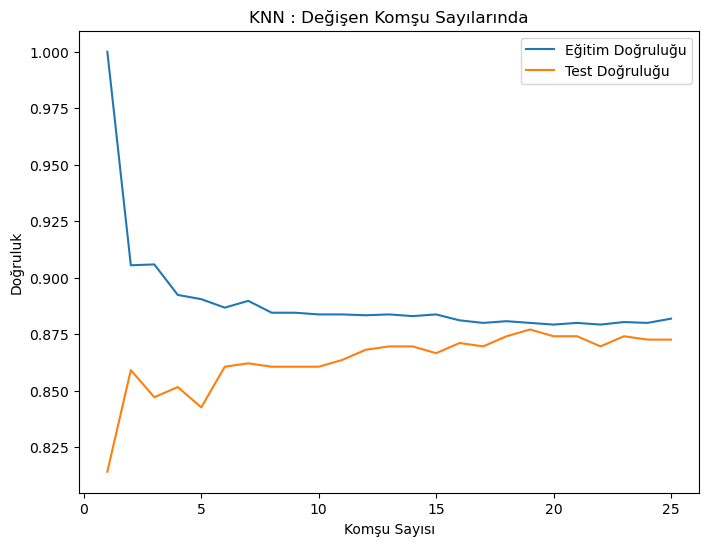

In [45]:
import matplotlib.pyplot as plt


train_accuracies = {}
test_accuracies = {}

neighbours = np.arange(1, 26)

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    train_accuracies[neighbour] = knn.score(X_train, y_train)
    test_accuracies[neighbour] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title('KNN : Değişen Komşu Sayılarında')
plt.plot(neighbours, train_accuracies.values(), label='Eğitim Doğruluğu')
plt.plot(neighbours, test_accuracies.values(), label='Test Doğruluğu')
plt.legend()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')

# KNN Sınıflandırıcısını Kullanarak Model Eğitimi ve Değerlendirme

### 1. Veri Yükleme ve Hazırlık
- **Veri seti**: `telecom_churn_clean.csv`
- Özellikler (`X`): `total_day_charge` ve `total_eve_charge`
- Hedef değişken (`y`): `churn`
- **Boyutlar**: `(X.shape, y.shape)` ile kontrol edildi.

---

### 2. KNN Modeli Eğitimi
- **KNN modeli** oluşturuldu ve `n_neighbors=15` olarak ayarlandı.
- `model_knn.fit(X, y)` ile veri üzerinde eğitildi.

---

### 3. Tahminler
- Yeni verilere tahmin yapılması için:
    ```python
    X_new = np.array([
        [56.8, 17.5],
        [24.4, 24.1],
        [50.1, 10.9]
    ])
    predictions = model_knn.predict(X_new)
    ```
- **Tahmin edilen sonuçlar**: `predictions`.

---

### 4. Eğitim ve Test Seti Ayrımı
- Veriler, `train_test_split` kullanılarak %80 eğitim, %20 test olarak bölündü.
- Bölümleme sırasında sınıfların dengeli kalması için **`stratify=y`** kullanıldı.
- Eğitim ve test doğruluğu ölçülmek üzere yeni bir KNN modeli (`n_neighbors=6`) eğitildi.

---

### 5. Komşu Sayısının Doğruluk Üzerindeki Etkisi
- **Farklı komşu sayılarında modelin performansı** incelendi.
- Eğitim ve test doğrulukları hesaplandı ve grafikte gösterildi.
  - Eğitim doğruluğu genelde komşu sayısı arttıkça azalır.
  - Test doğruluğu ise genelde bir noktada maksimuma ulaşıp düşebilir.

---

### 6. Görselleştirme
- Komşu sayısına göre eğitim ve test doğruluğu çizildi:
    - **X ekseni**: Komşu sayısı.
    - **Y ekseni**: Doğruluk.
    - **Eğri 1**: Eğitim doğruluğu.
    - **Eğri 2**: Test doğruluğu.



In [39]:
import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')
df_diabets.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_filtered

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
75,1,0,48,20,0,24.7,0.140,22,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
371,0,118,64,23,89,0.0,1.731,21,0


In [43]:
df_diabets.drop(df_filtered.index, inplace=True) # inplace = true demek gerçek veri üzerindede siler 
df_diabets

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
X = df_diabets.drop('glucose', axis=1).values #axis=1 sütün olduğunu gösterir
y = df_diabets['glucose'].values #.values ilede verileri numpy arraya çevirmiş oluyoruz

(type(X), type(y))

(numpy.ndarray, numpy.ndarray)

In [47]:
X_bmi = X[:, 4]
(X_bmi.shape, y.shape)

((752,), (752,))

In [49]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(752, 1)

Text(0.5, 0, 'Body Mass Index')

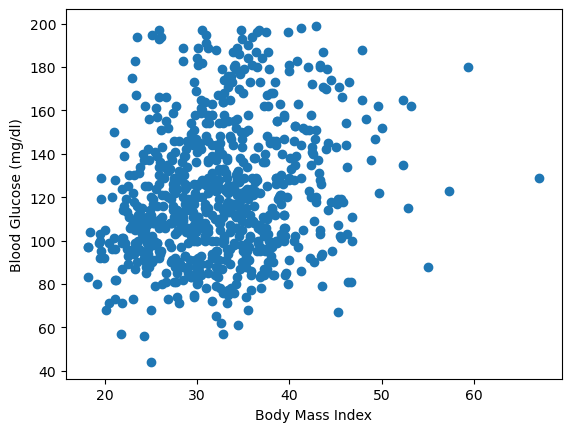

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi,y)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

### The Basics of Linear Regression

#### Regresyon Mekaniği

Verilere bir çizgi uydurmak istenir ve iki boyutta bu, **y = ax + b** biçimini alır. Tek bir özellik kullanmak **basit doğrusal regresyon** olarak bilinir. Burada:  
- **y**: hedef  
- **x**: özellik  
- **a** ve **b**: öğrenmek istediğimiz model parametreleridir.  

**a** ve **b** ayrıca model katsayıları veya sırasıyla **slope** (eğim) ve **intercept** (kesişim) olarak da adlandırılır.

Peki **a** ve **b** için değerler nasıl doğru bir şekilde seçilir?  
Herhangi bir verilen çizgi için bir **hata fonksiyonu** tanımlanabilir ve ardından bu fonksiyonu en aza indiren çizgi seçilebilir. Hata fonksiyonlarına ayrıca **loss** veya **cost** fonksiyonları da denir.

---

#### Loss Function

Bu dağılım grafiğini kullanarak bir **kayıp fonksiyonunu** görselleştirelim. Doğrunun gözlemlere mümkün olduğunca yakın olmasını istiyoruz. Bu nedenle, **uyum** ve **veri** arasındaki **dikey mesafeyi** en aza indirmek istiyoruz.  

Bu yüzden her gözlem için, gözlem ile doğru arasındaki dikey mesafeyi hesaplıyoruz. Bu mesafeye **residual** denir.


Text(0.5, 0, 'Body Mass Index')

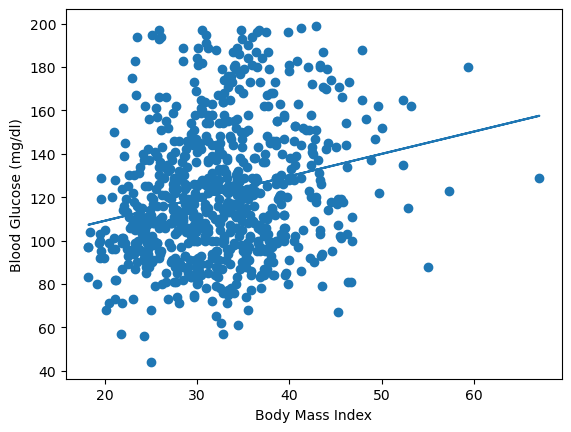

In [97]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg.fit(X_bmi, y)

predictions = model_reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
#Siyah çizgi, dogrusal regresyon modelinin kan glukoz degerlerinin vücut kitle indeksine uyumunu temsil etmektedir ve
#zayif-orta düzeyde pozitif bir korelasyona sahip oldugu görülmektedir.

NameError: name 'Error' is not defined

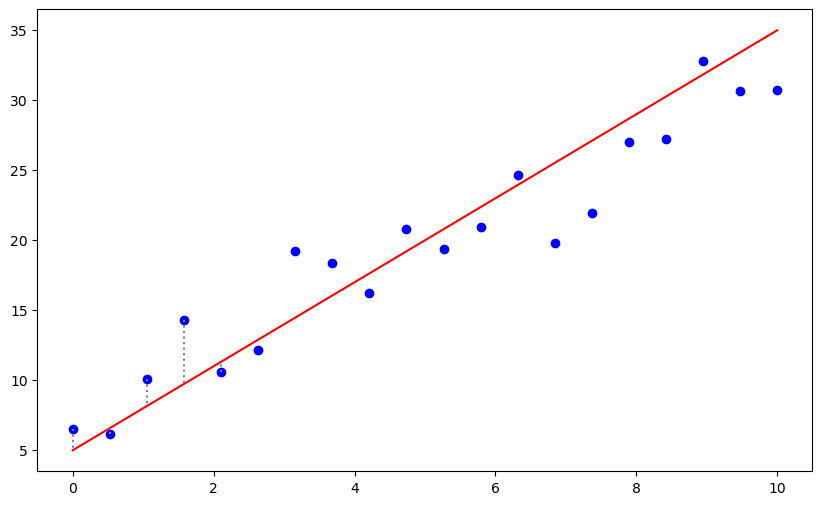

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the scatter plot
np.random.seed(42)
X = np.linspace(0, 10, 20)
Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))

# Fit a line (y = mx + c) manually
m = 3  # slope
c = 5  # intercept
Y_fit = m * X + c

# Calculate residuals (vertical distances between points and the line)
residuals = Y - Y_fit

# Plot the scatter plot and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')

# Add vertical lines to represent residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_fit[i]], color='gray', linestyle='dotted')
    if i == 4: Error

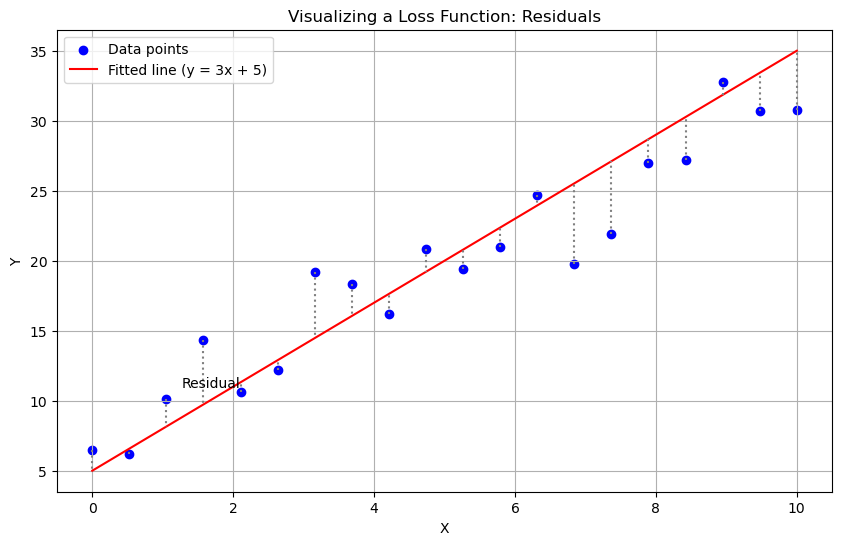

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the scatter plot
np.random.seed(42)
X = np.linspace(0, 10, 20)
Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))

# Fit a line (y = mx + c) manually
m = 3  # slope
c = 5  # intercept
Y_fit = m * X + c

# Calculate residuals (vertical distances between points and the line)
residuals = Y - Y_fit

# Plot the scatter plot and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')

# Add vertical lines to represent residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_fit[i]], color='gray', linestyle='dotted')
    if i == 4:  # Add a label to one residual line
        plt.text(X[i], (Y[i] + Y_fit[i]) / 2, 'Residual', color='black', fontsize=10, ha='right')

# Customize the plot
plt.title('Visualizing a Loss Function: Residuals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)


X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values


X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)


model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)
'''
Diyabet veri kümesindeki tüm özellikleri kullanarak kan şekeri seviyelerini tahmin etmek için doğrusal regresyon gerçekleştirelim. 
LinearRegression'ı sklearn-dot-linear_model'den içe aktarıyoruz. Ardından verileri eğitim ve test kümelerine ayırıyoruz, modeli 
örneklendiriyoruz, eğitim kümesine yerleştiriyoruz ve test kümesinde tahmin ediyoruz. 
Scikit-learn'deki doğrusal regresyonun kaputun altında OLS gerçekleştirdiğini unutmayın. 
'''


### Ordinary Least Squares

Artıkların toplamını en aza indirmeyi deneyebiliriz, ancak bu durumda her pozitif artığın her negatif artığı iptal etmesine neden olur. Bundan kaçınmak için **kalıntıların karesini** alırız.  

Tüm kareli kalıntıları toplayarak **kalıntı kareler toplamını** veya **RSS**'yi hesaplarız.  

RSS'yi en aza indirmeyi amaçladığımız bu doğrusal regresyon türüne **Sıradan En Küçük Kareler** veya **OLS (Ordinary Least Squares)** denir.


### Linear Regression in Higher Dimensions

**x1** ve **x2** olmak üzere iki özellik ve **y** olmak üzere bir hedef olduğunda, bir doğrusu şu biçimi alır:  
**y = a1x1 + a2x2 + b**.  

Bu nedenle, doğrusal bir regresyon modeli uydurmak için **a1**, **a2** ve intercept **b** olmak üzere üç değişken belirtilir.

**Çoklu doğrusal regresyon modeli** kurmak, **n** sayıda özellik için bir katsayı (**an**) ve **b** intercept değerlerini belirtmek anlamına gelir.  

Çoklu doğrusal regresyon modelleri için **scikit-learn**, özellik ve hedef değerleri için birer değişken bekler.


In [71]:
model_reg.score(X_test,y_test)

0.3282802627263198

In [77]:
model_reg.intercept_

75.7242926128128

In [79]:
model_reg.coef_

array([-0.32654116,  0.14686555, -0.27590315,  0.08606826,  0.36160446,
        1.8382773 ,  0.42185562, 25.08247323])

### Mean Squared Error and Root Mean Squared Error

Bir regresyon modelinin performansını değerlendirmenin bir başka yolu da **artık kareler toplamının** ortalamasını almaktır. Bu, **ortalama karesel hata** veya **MSE** (Mean Squared Error) olarak bilinir.  

MSE, hedef değişkenimizin karesi cinsinden ölçülür. Örneğin, bir model bir dolar değerini tahmin ediyorsa, MSE dolar kare cinsinden olacaktır.  

Dolara dönüştürmek için, **kök ortalama karesel hata** veya **RMSE** (Root Mean Squared Error) olarak bilinen karekökü alabiliriz.


In [89]:
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score


root_mean_squared_error(y_test, y_pred)

25.695203763480208